<a href="https://colab.research.google.com/github/osss2046/tareas/blob/main/tarea10_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tarea 10.10

Ejercicio 5.2.12 libro de Burden

Considere el problema de valor inicial

$$
y'(t) = -10y\,,\quad 0\leq t\leq 2\,,\quad y(0) = 1
$$

que tiene solución $y(t) = e^{-10t}$.¿Qué ocurre cuando el método de Euler se aplica a este problema con $h = 0.1$? ¿Viola la fórmula del error del método?

In [2]:
#importamos las librerias que vamos a usar
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importamos la definición del metodo de euler
def euler(f, a, b, yo, N):
  '''
  Esta función utiliza el metodo de euler, dada una función f en el rango [a,b] con una condición inicial y0 y N numeros de divisiones.
  '''
    
    h = (b-a)/N
    t = a
    w = yo
    ts = np.zeros(N+1)
    sol = np.zeros(N+1)
    
    for i in range(N):
        ts[i] = t
        sol[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts[N] = t
    sol[N] = w
    
    return ts, sol

In [28]:
# definimos la función que corresponde al enunciado
def f(t, y):
    return -10*y

euler(f, 0, 2, 1, 20)
# ponemos N = 20 para ver lo ocurre cuando h=0.1
#evaluamos y vemos que entrega 1 uno y puros ceros

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]))

Text(0, 0.5, 'y(t)')

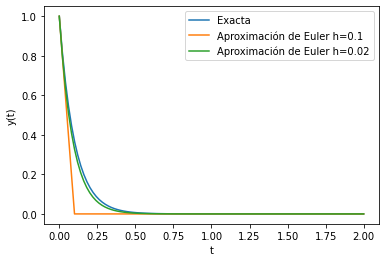

In [30]:
ts = np.linspace(0, 2, 100)
plt.plot(ts, np.exp(-10*ts), label='Exacta')
plt.plot(*euler(f, 0, 2, 1, 20), label='Aproximación de Euler h=0.1')
plt.plot(*euler(f, 0, 2, 1, 100), label='Aproximación de Euler h=0.02')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
# graficamos la función con la aproximación y vemos que decae abruptamente a cero, esta función decrece muy rapido, por lo tanto si tenemos
# un h tan grande la aproximación es mala, debemos poner mas pasos N para que h sea mas pequeño

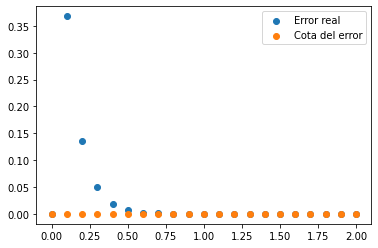

In [44]:
N = 20
N2 = 2000
ts, sol = euler(f, 0, 2, 1, N)
exacta = np.exp(-10*ts)
h = 2/N
h2 = 2/N2
M = np.abs(100*np.exp(-20))
L = 1
plt.scatter(ts, exacta - sol, label='Error real')
plt.scatter(ts, h*M/(2*L)*(np.exp(L*ts) - 1), label='Cota del error')
plt.legend()

In [ ]:
# vemos que el error real es mayor a la cota de error, por lo tanto esta fallando el la formula del error del metodo,
# se puede intuir que se debe a que tenemos numeros que se multiplican por exponenciales de -20, los cuales decrecen demasiado rapido.